In [1]:
import pandas as pd
import numpy as np

In [270]:
divorce_df=pd.read_excel('Divocre Rata Analysis.xlsx')

In [271]:
divorce_df.isnull().sum()

Man's City                        0
Woman's City                      0
Man Age                           0
Woman Age                         0
Man's Education                   0
Woman's Education                 0
Man's Monthly Income              0
Woman's Working Status            0
Woman's Job Type                  0
Family System                     0
Relation with Spouse              0
No. of children                   0
Husband Drug Status (yes, no)     1
Marriage Type                     1
Reason of Divorce                 2
Reasons from Man Sdie            15
Reasons                           0
Reasons from Woman Side           6
Span of Marriage Life             1
Marriage No. of Male              0
Submission ID                     3
Marriage No. of Female            0
dtype: int64

In [272]:
target_data=divorce_df.iloc[:,2:-5]

In [273]:
target_data.columns

Index(['Man Age', 'Woman Age', 'Man's Education', 'Woman's Education',
       'Man's Monthly Income', 'Woman's Working Status', 'Woman's Job Type',
       'Family System', 'Relation with Spouse', 'No. of children',
       'Husband Drug Status (yes, no)', 'Marriage Type', 'Reason of Divorce',
       'Reasons from Man Sdie', 'Reasons'],
      dtype='object')

In [274]:
target_data.drop(['No. of children','Reason of Divorce',
       'Reasons from Man Sdie'],axis=1,inplace=True)

In [275]:
target_data['Husband Drug Status (yes, no)']=target_data['Husband Drug Status (yes, no)'].apply(lambda x: 0 if x=='Yes' else 1 )

In [276]:
target_data['Woman\'s Working Status']=target_data['Woman\'s Working Status'].apply(lambda x: 0 if x=='House wife' else 1 )

In [277]:
target_data['Woman\'s Job Type']=target_data['Woman\'s Job Type'].apply(lambda x: 0 if x=='N\A' else 1 )

In [278]:
target_data['Family System']=target_data['Family System'].apply(lambda x: 0 if x=='Combine' else 1 )

In [279]:
target_data['Relation with Spouse']=target_data['Relation with Spouse'].apply(lambda x: 0 if x=='Unkown' else 1 )

In [280]:
target_data['Marriage Type']=target_data['Marriage Type'].apply(lambda x: 0 if x=='Arrange' else 1 )

In [281]:
target_data.head(2)

,Man Age,Woman Age,Man's Education,Woman's Education,Man's Monthly Income,Woman's Working Status,Woman's Job Type,Family System,Relation with Spouse,"Husband Drug Status (yes, no)",Marriage Type,Reasons
0,22,18,5,5,20000,0,0,0,0,1,0,"intervention of wife family ,dead threats to w..."
1,24,24,10,16,90000,1,1,1,1,1,1,"no child,financial problems,, job lost"


In [282]:
target_data.isnull().sum()

Man Age                          0
Woman Age                        0
Man's Education                  0
Woman's Education                0
Man's Monthly Income             0
Woman's Working Status           0
Woman's Job Type                 0
Family System                    0
Relation with Spouse             0
Husband Drug Status (yes, no)    0
Marriage Type                    0
Reasons                          0
dtype: int64

In [283]:
target_data['lable']=0

In [284]:
from sklearn.feature_extraction.text import CountVectorizer

In [285]:
########################################################################################################

In [286]:
success_df=pd.read_excel('Success Full Marriage Analysis.xlsx')

In [287]:
success_df.isnull().sum()

Gender                                                  0
Boy's City                                              3
Girl's City                                             1
Boy's Age (Agr apko idea ha)                            0
Girl's Age (Agr apko idea ha)                           0
Boy's Education                                         0
Girl's Education                                        0
Boy's Monthly Income                                    0
Girl's status (house wife, job holder)                  0
Woman's Job Type                                        0
Family System                                           0
Relation with Spouse                                    0
No of children                                         15
Husband Drug Status (yes, no)                           0
Marriage Type                                           0
Span of Marriage Life(Shaadi ko kitny saal ho gaye)     0
Marriage No (First, 2nd, 3rd marriage)                  0
Why your marri

In [288]:
success_df=success_df.iloc[:,3:]

In [289]:
success_df.columns

Index(['Boy's Age (Agr apko idea ha)', 'Girl's Age (Agr apko idea ha)',
       'Boy's Education', 'Girl's Education', 'Boy's Monthly Income',
       'Girl's status (house wife, job holder)', 'Woman's Job Type',
       'Family System', 'Relation with Spouse', 'No of children',
       'Husband Drug Status (yes, no)', 'Marriage Type',
       'Span of Marriage Life(Shaadi ko kitny saal ho gaye)',
       'Marriage No (First, 2nd, 3rd marriage)',
       'Why your marriage is Successful?', 'Submission ID', 'Reasons'],
      dtype='object')

In [290]:
success_df['Husband Drug Status (yes, no)']=success_df['Husband Drug Status (yes, no)'].apply(lambda x: 0 if x=='Yes' else 1 )
success_df['Girl\'s status (house wife, job holder)']=success_df['Girl\'s status (house wife, job holder)'].apply(lambda x: 0 if x=='House wife' else 1 )
success_df['Woman\'s Job Type']=success_df['Woman\'s Job Type'].apply(lambda x: 0 if x=='N\A' else 1 )
success_df['Family System']=success_df['Family System'].apply(lambda x: 0 if x=='Combine' else 1 )
success_df['Relation with Spouse']=success_df['Relation with Spouse'].apply(lambda x: 0 if x=='Unkown' else 1 )
success_df['Marriage Type']=success_df['Marriage Type'].apply(lambda x: 0 if x=='Arrange' else 1 )

In [291]:
success_df['lable']=1

In [292]:
success_df.drop(['Marriage No (First, 2nd, 3rd marriage)','Submission ID'
                 ,'No of children','Why your marriage is Successful?','Span of Marriage Life(Shaadi ko kitny saal ho gaye)'
                ],axis=1,inplace=True)

In [293]:
success_df.columns=target_data.columns

In [294]:
df=pd.concat([success_df,target_data])

In [295]:
df.isnull().sum()

Man Age                          0
Woman Age                        0
Man's Education                  0
Woman's Education                0
Man's Monthly Income             0
Woman's Working Status           0
Woman's Job Type                 0
Family System                    0
Relation with Spouse             0
Husband Drug Status (yes, no)    0
Marriage Type                    0
Reasons                          0
lable                            0
dtype: int64

In [296]:
sparse_df=vectorizer.fit_transform(df.Reasons)

In [297]:
sparse_df = pd.DataFrame(sparse_df.toarray())

In [298]:
sparse_df=sparse_df.reset_index(drop=True)

In [299]:
df.drop('Reasons',axis=1,inplace=True)

In [300]:
df=df.reset_index(drop=True)

In [301]:
df=pd.concat([df,sparse_df],axis=1)

In [302]:
df = df.sample(frac=1).reset_index(drop=True)

In [303]:
X=df.drop('lable',axis=1)

In [304]:
y=df['lable']

In [305]:
y

0     0
1     1
2     1
3     0
4     0
     ..
64    0
65    0
66    1
67    0
68    1
Name: lable, Length: 69, dtype: int64

In [309]:
import matplotlib.pyplot as plt

In [310]:
from sklearn.model_selection import train_test_split

In [311]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=23)

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: 

+ ==================================================================================================== +
			1-For Support Vector Classifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.5714285714285714
--------------------------------------------------
F1 :  [0.         0.72727273]
--------------------------------------------------
Reacll :  [0. 1.]
--------------------------------------------------
Precision :  [0.         0.57142857]
--------------------------------------------------
cross validation accuracy :  0.4956043956043956
--------------------------------------------------
Confusion Matrix....
 [[0 6]
 [0 8]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.57      1.00      0.73         8

    accuracy                 

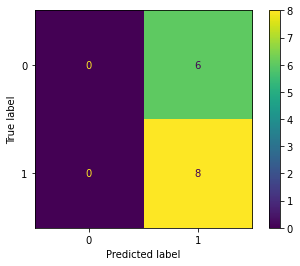

							-----------------------------------------------------------
							 Time for detection (Support Vector Classifier) : 0.285 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. 

+ ==================================================================================================== +
			2-For LogisitcRegression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9285714285714286
--------------------------------------------------
F1 :  [0.92307692 0.93333333]
--------------------------------------------------
Reacll :  [1.    0.875]
--------------------------------------------------
Precision :  [0.85714286 1.        ]
--------------------------------------------------
cross validation accuracy :  0.8241758241758242
--------------------------------------------------
Confusion Matrix....
 [[6 0]
 [1 7]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.88      0.93         8

    accuracy                  

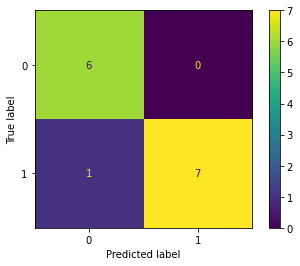

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 0.633 seconds...
							-----------------------------------------------------------

+

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


 ==================================================================================================== +
			3-For KNeighborsClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7142857142857143
--------------------------------------------------
F1 :  [0.5 0.8]
--------------------------------------------------
Reacll :  [0.33333333 1.        ]
--------------------------------------------------
Precision :  [1.         0.66666667]
--------------------------------------------------
cross validation accuracy :  0.6252747252747253
--------------------------------------------------
Confusion Matrix....
 [[2 4]
 [0 8]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.67      1.00      0.80         8

    accuracy                     

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


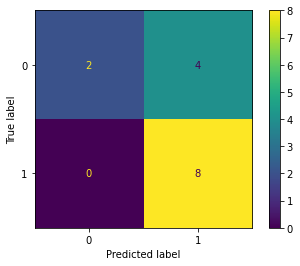

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


							-----------------------------------------------------------
							 Time for detection (KNeighborsClassifier) : 0.397 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


+ ==================================================================================================== +
			4-For RandomForestClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9285714285714286
--------------------------------------------------
F1 :  [0.90909091 0.94117647]
--------------------------------------------------
Reacll :  [0.83333333 1.        ]
--------------------------------------------------
Precision :  [1.         0.88888889]
--------------------------------------------------
cross validation accuracy :  0.9571428571428571
--------------------------------------------------
Confusion Matrix....
 [[5 1]
 [0 8]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.89      1.00      0.94         8

    accuracy    

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


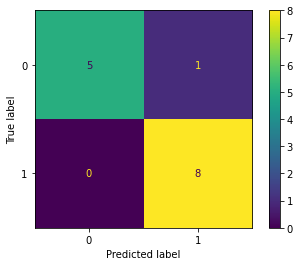

							-----------------------------------------------------------
							 Time for detection (RandomForestClassifier) : 1.146 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


+ ==================================================================================================== +
			5-For AdaBoostClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9285714285714286
--------------------------------------------------
F1 :  [0.90909091 0.94117647]
--------------------------------------------------
Reacll :  [0.83333333 1.        ]
--------------------------------------------------
Precision :  [1.         0.88888889]
--------------------------------------------------
cross validation accuracy :  0.9428571428571428
--------------------------------------------------
Confusion Matrix....
 [[5 1]
 [0 8]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.89      1.00      0.94         8

    accuracy        

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


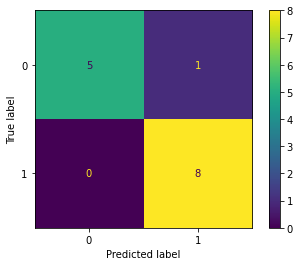

							-----------------------------------------------------------
							 Time for detection (AdaBoostClassifier) : 0.737 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			6-For DecisionTreeClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  1.0
--------------------------------------------------
F1 :  [1. 1.]
--------------------------------------------------
Reacll :  [1. 1.]
--------------------------------------------------
Precision :  [1. 1.]
--------------------------------------------------
cross validation accuracy :  0.8989010989010989
--------------------------------------------------
Confusion Matrix....
 [[6 0]
 [0 8]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-sco

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\users\zee tech\appdata\local\programs\p

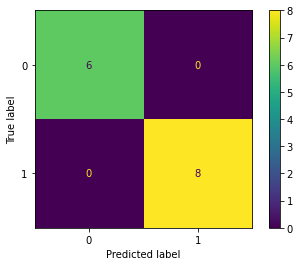

							-----------------------------------------------------------
							 Time for detection (DecisionTreeClassifier) : 0.248 seconds...
							-----------------------------------------------------------



,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,Support Vector Classifier,0.571429,"[0.0, 0.5714285714285714]","[0.0, 1.0]","[0.0, 0.7272727272727273]","[[0, 6], [0, 8]]"
1,LogisitcRegression,0.928571,"[0.8571428571428571, 1.0]","[1.0, 0.875]","[0.923076923076923, 0.9333333333333333]","[[6, 0], [1, 7]]"
2,KNeighborsClassifier,0.714286,"[1.0, 0.6666666666666666]","[0.3333333333333333, 1.0]","[0.5, 0.8]","[[2, 4], [0, 8]]"
3,RandomForestClassifier,0.928571,"[1.0, 0.8888888888888888]","[0.8333333333333334, 1.0]","[0.9090909090909091, 0.9411764705882353]","[[5, 1], [0, 8]]"
4,AdaBoostClassifier,0.928571,"[1.0, 0.8888888888888888]","[0.8333333333333334, 1.0]","[0.9090909090909091, 0.9411764705882353]","[[5, 1], [0, 8]]"
5,DecisionTreeClassifier,1.000000,"[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[[6, 0], [0, 8]]"


In [312]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix

# check the performance on diffrent regressor
models = []
models.append(('Support Vector Classifier', svm.SVC()))
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))


# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)
    
    # evaluate model
    scores = cross_val_score(clf, X, y, cv=cv, n_jobs=-1)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})